# Visual Analytics

## Assignment 1

**Instructor:** Dr. Marco D'Ambros  
**TAs:** Carmen Armenti, Mattia Giannaccari

**Contacts:** marco.dambros@usi.ch, carmen.armenti@usi.ch, mattia.giannaccari@usi.ch

**Due Date:** 10 April, 2025 @ 23:55

---

### Goal

The goal of this assignment is to use Python and Jupyter notebook to explore, analyze and visualize the datasets provided. 

The assignment is divided into four sections, each requiring you to apply the knowledge gained from both the theoretical and practical lectures to solve the exercises. Specifically, when creating tabular or graphical representations, you should apply the principles learned in the theoretical lectures and use the technologies introduced in the practical sessions. The datasets you need to use are detailed in the **Datasets Description** section and can be found in the following folder [Assignment1_Data](https://usi365-my.sharepoint.com/:f:/g/personal/armenc_usi_ch/EqjXB7uSEoVAujKPSZY1hvIBMhAXJv5y6Z-UwaO6bCtOjg?e=kxcaai).

### Submission Guidelines
- **Format:** Please submit a Jupyter Notebook containing your solutions along with a clear explanation of the **steps** taken to arrive at each solution. Each solution must be introduced by a Markdown cell indicating the exercise number. If you prefer, you may use the uploaded assignment file and develop your solution by adding cells below each exercise instructions. It is essential that every choice is justified, and the solution is thoroughly commented to explain each step. Exercises without explanations will be evaluated negatively.

- **Filename:** Please name the Jupyter notebook as follows: `SurenameName_Assignment1.ipynb`.

- **Submission:** Please submit your solution (the jupyter notebook and any other script you may have used to support your solution) to iCorsi.


---
## Section 1 - Data quality (10 points)

**Data Source:** `used_cars.csv`.

In the `used_cars.csv` dataset, please perform the following data cleaning steps: 
- Identify any missing or invalid values in the following columns: `vehicle type`, `price`, `brand`, and `month of registration`. If needed, standardize the data. For the `price` column specifically, the prices are recorded in euros, please consider valid only values within the range of €1,000 and €500,000. 
- For each of the previous columns, report the number of missing or invalid entries.
- After identifying missing or invalid values in the columns above, remove **any** rows where at least one of these columns contains such data.

Please clearly outline the steps you take to clean the dataset and document your approach. You may use any preferred tool or technology, such as Python (vanilla or Pandas) or OpenRefine.

In [1]:
import pandas as pd
import numpy as np

# Read the dataset
print("Loading the dataset...")
df = pd.read_csv('datasets/used_cars.csv', encoding='cp1252')

# Remove leading/trailing spaces, collapse multiple spaces, and convert to lower case for consistency.
df['brand'] = df['brand'].astype(str).str.strip()                  \
                              .str.replace(r'\s+', ' ', regex=True)  \
                              .str.lower()
# Initial data inspection
columns_to_check = ['vehicleType', 'price', 'brand', 'monthOfRegistration']
print("\nInitial dataset shape:", df.shape)

# Analyze missing values
missing_values = df[columns_to_check].isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Analyze invalid values
# For price: valid range is €1,000 to €500,000
invalid_prices = df[~df['price'].between(1000, 500000)].shape[0]
print(f"\nInvalid prices (outside €1,000-€500,000): {invalid_prices}")

# Create clean dataset by removing rows with issues
df_clean = df[
    # Remove rows with any missing values in the specified columns
    df[columns_to_check].notna().all(axis=1) &
    # Remove rows with invalid prices
    df['price'].between(1000, 500000)
]

# Report the results
print("\nData Cleaning Summary:")
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after cleaning: {len(df_clean)}")
print(f"Number of rows removed: {len(df) - len(df_clean)}")

# Show sample of clean data
print("\nSample of clean data (first 5 rows):")
print(df_clean[columns_to_check].head())


Loading the dataset...

Initial dataset shape: (371528, 20)

Missing values per column:
vehicleType            37869
price                      0
brand                      0
monthOfRegistration        0
dtype: int64

Invalid prices (outside €1,000-€500,000): 83435

Data Cleaning Summary:
Original number of rows: 371528
Number of rows after cleaning: 267438
Number of rows removed: 104090

Sample of clean data (first 5 rows):
  vehicleType  price       brand  monthOfRegistration
1       coupe  18300        audi                    5
2         suv   9800        jeep                    8
3  kleinwagen   1500  volkswagen                    6
4  kleinwagen   3600       skoda                    7
6      cabrio   2200     peugeot                    8


## Section 2 - Data Analysis, Visualization, and Exploration (60 points) 📊
In this section, you will need to use two different datasets: `us_accidents.csv` for the first three exercises and `eu_energy.csv` for the next three. Each exercise is worth 10 points.

### Section 2.1 
**Data Source**: `us_accidents.csv`

1. In the US Accidents dataset please remove all rows where one or more columns have missing data and explicitly identify the number of rows with null values. Consider the years 2020 and 2022.

    - What are the cities with the highest number of accidents in 2020 and 2022? Report them with the number of accidents.
    - Please provide the yearly total number of car accidents in 2020 and 2022 for each `County` and `City` combination.
    - Please retrieve the 10 cities with the highest total number of accidents in 2020 and 2022, and create a visualization that:
    
        - As a **primary goal** shows the increase in accident numbers for each city that allows the comparison of the increase per city. Which is the city with the most significant increase?
        - As a **secondary goal** presents the absolute number of accidents in both 2020 and 2022 for each selected city.
    
    Please explain the insights gained from the visualization and justify the choice of the representation.


Processing US accidents dataset in chunks...
Processing chunk 10...
Processing chunk 20...
Processing chunk 30...
Processing chunk 40...
Processing chunk 50...
Processing chunk 60...
Processing chunk 70...

Processing complete. Time taken: 38.96 seconds.
Creating analysis...

--- Analysis Results ---

--- Interactive Top Cities by Accident Count in 2020 ---



--- Interactive Top Cities by Accident Count in 2022 ---



--- Interactive County-Level Accident Counts for 2020 ---



--- Interactive County-Level Accident Counts for 2022 ---



--- Top 10 Cities by Total Accidents (2020 & 2022) and Growth ---


Year,2020,2022,Increase
City,,,
Miami,20106,35515,15409
Los Angeles,16854,15346,-1508
Orlando,8120,19986,11866
Dallas,7466,10982,3516
Charlotte,8776,9558,782
Houston,6591,11403,4812
Raleigh,5732,7912,2180
San Diego,5453,7144,1691
Nashville,4728,7174,2446


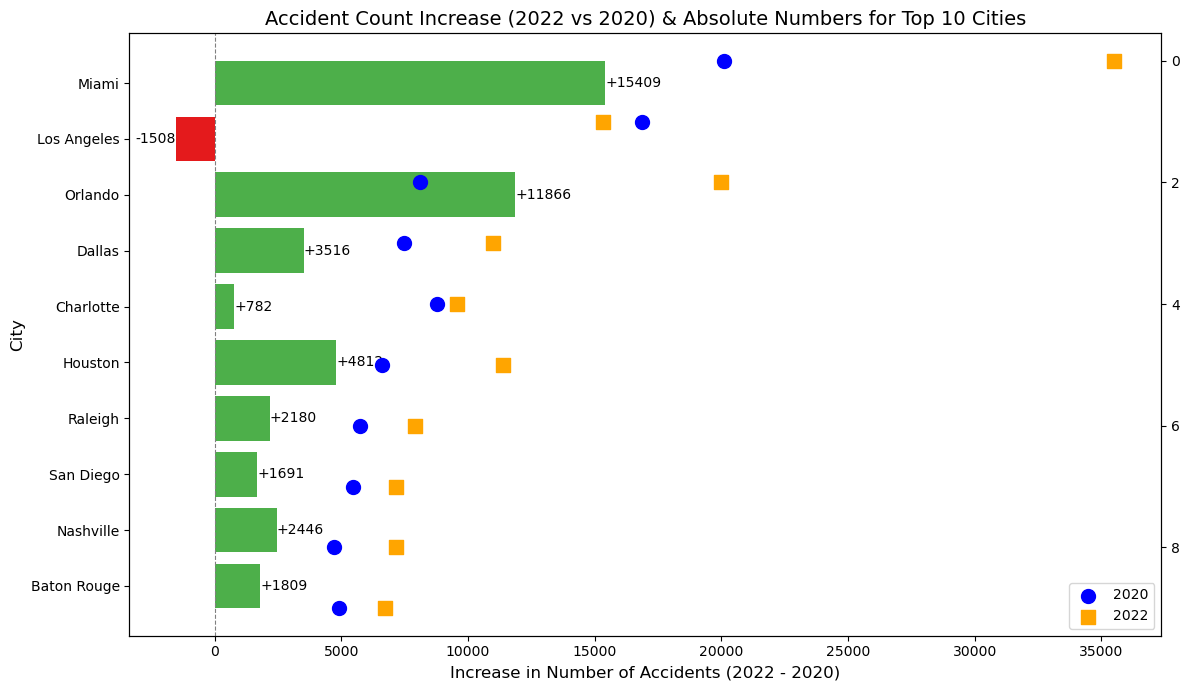


City (within Top 10) with the most significant increase: Miami
  2020 accidents: 20106
  2022 accidents: 35515
  Increase: +15409

--- Data Cleaning Summary (for years 2020 & 2022) ---
Total rows processed (matching years 2020/2022): 2,287,055
Total rows removed due to missing City/County: 826,001
Total rows remaining after cleaning & filtering: 1,461,054
Verification: Sum of accidents in final city data: 1,461,054

--- Null Value Counts (across processed 2020/2022 chunks) ---


,Null Count
End_Lat,706426
End_Lng,706426
Precipitation(in),102080
Wind_Chill(F),73610
Wind_Direction,65433
Wind_Speed(mph),65402
Humidity(%),58437
Visibility(mi),56052
Temperature(F),54629
Weather_Condition,53578



Analysis finished.


In [2]:
# Required imports for interactivity
# Make sure to install ipywidgets: pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display, clear_output

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time # Optional: can be used for demonstration/timing

# --- New Interactive Helper Function ---
def display_interactive_paginated_table(df, page_size=10):
    """
    Displays a Pandas DataFrame using an interactive widget (IntSlider)
    to select the page number. Designed for Jupyter environments.

    Args:
        df (pd.DataFrame): The DataFrame to display.
        page_size (int): The number of rows per page.
    """
    # Ensure the DataFrame is not empty
    if df.empty:
        print("--- No data to display ---")
        return

    # Calculate the total number of pages
    n = len(df)
    # Ensure pages is at least 1, even for empty df after check (safety)
    pages = max(1, (n + page_size - 1) // page_size)

    # --- Create Interactive Widgets ---
    # Using IntSlider for page selection. Alternatives: Dropdown, SelectionSlider
    page_slider = widgets.IntSlider(
        value=1,           # Initial page
        min=1,             # First page is 1
        max=pages,         # Last page number
        step=1,            # Go page by page
        description='Page:', # Label for the slider
        continuous_update=False, # Update only when interaction stops
        orientation='horizontal',
        readout=True,      # Display the current value
        readout_format='d' # Format as integer
    )

    # Create an output area to display the DataFrame slice
    output_area = widgets.Output()

    # --- Define Update Logic ---
    def on_page_change(change):
        """Callback function executed when the slider value changes."""
        page_num = change['new'] # Get the newly selected page number
        # Calculate row indices for the selected page
        # Page numbers are 1-based, indices are 0-based
        start_index = (page_num - 1) * page_size
        # end_index should not exceed the number of rows
        end_index = min(start_index + page_size, n)

        # Update the content displayed in the output area
        with output_area:
            clear_output(wait=True) # Clear previous page's output
            print(f"--- Displaying Page {page_num} of {pages} (Rows {start_index + 1} to {end_index}) ---")
            # Display the relevant slice of the DataFrame using IPython's display
            display(df.iloc[start_index:end_index])

    # --- Link Widgets and Display ---
    # Register the callback function to be triggered on slider value change
    page_slider.observe(on_page_change, names='value')

    # Display the slider and the output area, stacked vertically
    display(widgets.VBox([page_slider, output_area]))

    # Manually trigger the display for the initial page (page 1)
    # This ensures the first page is shown when the cell is executed
    on_page_change({'new': page_slider.value})

# --- Rest of your script ---

# Initialize dictionaries to store aggregated data
city_year_accidents = {}         # Format: {(city, year): count}
county_city_year_accidents = {}    # Format: {(county, city, year): count}
total_null_counts = pd.Series(dtype='int64')  # Use 'int64' for compatibility

# Variables to accumulate row counts during cleaning
total_rows_processed_after_filter = 0 # Track rows after year filter, before dropna
total_rows_removed = 0                # Track rows removed by dropna

print("Processing US accidents dataset in chunks...")
print("="*30)

# Define the chunk size based on available memory
chunk_size = 100000
start_time_proc = time.time() # Start timer for processing

try:
    # Specify the path to your dataset
    dataset_path = 'datasets/us_accidents.csv'
    chunks = pd.read_csv(dataset_path, chunksize=chunk_size, low_memory=False,
                         on_bad_lines='warn') # 'warn' or 'skip'

    chunk_count = 0 # To track number of chunks processed
    for i, chunk in enumerate(chunks):
        chunk_count += 1
        if chunk_count % 10 == 0: # Print progress every 10 chunks
             print(f"Processing chunk {chunk_count}...")

        # --- Data Cleaning and Preparation ---
        chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'], errors='coerce')
        chunk.dropna(subset=['Start_Time'], inplace=True)
        chunk['Year'] = chunk['Start_Time'].dt.year.astype(int)

        # Filter rows for 2020 and 2022 *before* counting rows_before
        chunk = chunk[chunk['Year'].isin([2020, 2022])].copy()

        # Track rows after year filter
        rows_before = len(chunk)
        if rows_before == 0: continue # Skip empty chunks after filtering
        total_rows_processed_after_filter += rows_before

        # Update total null counts across chunks (only for relevant years)
        current_null_counts = chunk.isnull().sum()
        total_null_counts = total_null_counts.add(current_null_counts, fill_value=0)

        # Drop rows with null values in required columns ('City', 'County')
        chunk_clean = chunk.dropna()
        rows_after = len(chunk_clean)
        total_rows_removed += (rows_before - rows_after)

        # --- Aggregation ---
        city_year_counts = chunk_clean.groupby(['City', 'Year'], observed=False).size()
        for (city, year), count in city_year_counts.items():
            city_year_accidents[(city, year)] = city_year_accidents.get((city, year), 0) + count

        county_city_year_counts = chunk_clean.groupby(['County', 'City', 'Year'], observed=False).size()
        for (county, city, year), count in county_city_year_counts.items():
            county_city_year_accidents[(county, city, year)] = county_city_year_accidents.get((county, city, year), 0) + count

except FileNotFoundError:
    print(f"Error: Dataset not found at '{dataset_path}'. Please check the path.")
    exit() # Exit if the file isn't found
except Exception as e:
    print(f"An error occurred during chunk processing: {e}")
    exit() # Exit on other critical processing errors

end_time_proc = time.time() # End timer for processing
print(f"\nProcessing complete. Time taken: {end_time_proc - start_time_proc:.2f} seconds.")
print("Creating analysis...")
print("="*30)

# --- Data Analysis ---

# Convert aggregated dictionaries to DataFrames
if city_year_accidents:
    city_accidents = pd.DataFrame([(city, year, count)
                                   for (city, year), count in city_year_accidents.items()],
                                  columns=['City', 'Year', 'Accidents'])
else:
    city_accidents = pd.DataFrame(columns=['City', 'Year', 'Accidents'])

if county_city_year_accidents:
    county_city_accidents = pd.DataFrame([(county, city, year, count)
                                          for (county, city, year), count in county_city_year_accidents.items()],
                                         columns=['County', 'City', 'Year', 'Accidents'])
else:
    county_city_accidents = pd.DataFrame(columns=['County', 'City', 'Year', 'Accidents'])

# --- QUESTION 1: Display Top City Accident Counts for 2020 and 2022 ---
print("\n--- Analysis Results ---")

if not city_accidents.empty:
    city_2020 = city_accidents[city_accidents['Year'] == 2020].sort_values('Accidents', ascending=False).reset_index(drop=True)
    city_2022 = city_accidents[city_accidents['Year'] == 2022].sort_values('Accidents', ascending=False).reset_index(drop=True)

    print("\n--- Interactive Top Cities by Accident Count in 2020 ---")
    if not city_2020.empty:
        display_interactive_paginated_table(city_2020, page_size=10) # Use new function
    else:
        print("No city data available for 2020.")

    print("\n--- Interactive Top Cities by Accident Count in 2022 ---")
    if not city_2022.empty:
        display_interactive_paginated_table(city_2022, page_size=10) # Use new function
    else:
        print("No city data available for 2022.")
else:
    print("\n--- No city accident data processed for 2020/2022 ---")


# --- QUESTION 2: Display County-level Accident Counts (Separate for 2020 and 2022) ---

# Aggregate county-level accidents by grouping county (summing over cities) for 2020 and 2022
county_accidents = county_city_accidents.groupby(['County', 'Year'], observed=False)['Accidents'].sum().reset_index()
county_accidents = county_accidents.sort_values(['Year', 'Accidents'], ascending=[True, False]).reset_index(drop=True)

# Separate the data for 2020 and 2022
county_2020 = county_accidents[county_accidents['Year'] == 2020].reset_index(drop=True)
county_2022 = county_accidents[county_accidents['Year'] == 2022].reset_index(drop=True)

print("\n--- Interactive County-Level Accident Counts for 2020 ---")
if not county_2020.empty:
    display_interactive_paginated_table(county_2020, page_size=10)
else:
    print("No county data available for 2020.")

print("\n--- Interactive County-Level Accident Counts for 2022 ---")
if not county_2022.empty:
    display_interactive_paginated_table(county_2022, page_size=10)
else:
    print("No county data available for 2022.")


# --- QUESTION 3: Top 10 Cities with Highest Total Accidents and Their Growth ---
if not city_accidents.empty:
    # Aggregate total accidents per city (across 2020 and 2022) and select the top 10 cities
    total_city_accidents = city_accidents.groupby('City', observed=False)['Accidents'].sum().sort_values(ascending=False)
    
    if not total_city_accidents.empty:
        top10_cities_index = total_city_accidents.head(10).index
        # Filter original city_accidents for these top 10 cities and create a pivot table with Year columns
        top10_data = city_accidents[city_accidents['City'].isin(top10_cities_index)].copy()
        top10_pivot = top10_data.pivot(index='City', columns='Year', values='Accidents').fillna(0)

        # Ensure both years exist as columns. Otherwise, add them with 0.
        if 2020 not in top10_pivot.columns: 
            top10_pivot[2020] = 0
        if 2022 not in top10_pivot.columns: 
            top10_pivot[2022] = 0

        # Reorder columns: first 2020 then 2022.
        top10_pivot = top10_pivot[[2020, 2022]]
        # Calculate the growth (increase) in accidents from 2020 to 2022
        top10_pivot['Increase'] = top10_pivot[2022] - top10_pivot[2020]
        # Reorder the DataFrame to preserve the top10 order from total_city_accidents
        top10_pivot = top10_pivot.loc[top10_cities_index]
        
        # Print the pivot table for inspection (optional, for Jupyter display)
        print("\n--- Top 10 Cities by Total Accidents (2020 & 2022) and Growth ---")
        display(top10_pivot.astype(int))
        
        # --- Visualization ---
        plt.figure(figsize=(12, 7))
        
        # Create the horizontal bar chart for the accident increase (primary goal)
        # Use green for positive growth, red for negative, and gray for no change
        bar_colors = ['#4daf4a' if x > 0 else '#e41a1c' if x < 0 else '#999999' for x in top10_pivot['Increase']]
        bars = plt.barh(top10_pivot.index, top10_pivot['Increase'], color=bar_colors)
        
        # Annotate each bar with the numeric increase value
        for i, city in enumerate(top10_pivot.index):
            inc_val = int(top10_pivot.loc[city, 'Increase'])
            # Position annotation slightly offset from the bar's end
            offset = 5 * np.sign(inc_val) if inc_val != 0 else 5
            ha = 'left' if inc_val >= 0 else 'right'
            plt.text(top10_pivot.loc[city, 'Increase'] + offset, i, f'{inc_val:+}', 
                     va='center', ha=ha, fontsize=10, color='black')
        
        # Secondary Axis to plot absolute accident numbers (2020 and 2022)
        ax = plt.gca()
        ax2 = plt.twinx(ax)
        
        # For each city, plot a circle for 2020 (blue) and a square for 2022 (orange)
        for i, city in enumerate(top10_pivot.index):
            acc_2020 = int(top10_pivot.loc[city, 2020])
            acc_2022 = int(top10_pivot.loc[city, 2022])
            ax2.scatter(acc_2020, i, color='blue', s=100, marker='o', label='2020' if i == 0 else "")
            ax2.scatter(acc_2022, i, color='orange', s=100, marker='s', label='2022' if i == 0 else "")
        
        # Set labels and titles for both axes
        ax.set_xlabel('Increase in Number of Accidents (2022 - 2020)', fontsize=12)
        ax2.set_xlabel('Absolute Number of Accidents', fontsize=12)
        ax.set_ylabel('City', fontsize=12)
        plt.title('Accident Count Increase (2022 vs 2020) & Absolute Numbers for Top 10 Cities', fontsize=14)
        
        # Invert the y-axis so that the city with highest value is at the top
        ax.invert_yaxis()
        ax2.invert_yaxis()
        
        # Add a vertical line at x=0 for reference
        plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Create a legend for the secondary axis (absolute accident numbers)
        ax2.legend(loc='lower right')
        
        plt.tight_layout()
        plt.show()
        
        # Identify and print the city with the most significant increase among the top 10
        max_increase_city = top10_pivot.loc[top10_pivot['Increase'].idxmax()]
        print(f"\nCity (within Top 10) with the most significant increase: {top10_pivot['Increase'].idxmax()}")
        print(f"  2020 accidents: {int(max_increase_city[2020])}")
        print(f"  2022 accidents: {int(max_increase_city[2022])}")
        print(f"  Increase: {int(max_increase_city['Increase']):+}")
    else:
        print("\n--- No aggregated city data available to determine top 10 ---")
else:
    print("\n--- Skipping Top 10 Cities analysis (no data) ---")



# --- Final Summary ---
print("\n" + "="*30)
print("--- Data Cleaning Summary (for years 2020 & 2022) ---")
total_rows_kept = total_rows_processed_after_filter - total_rows_removed
print(f"Total rows processed (matching years 2020/2022): {total_rows_processed_after_filter:,}") # Add comma separator
print(f"Total rows removed due to missing City/County: {total_rows_removed:,}")
print(f"Total rows remaining after cleaning & filtering: {total_rows_kept:,}")
# Verify against aggregated data
verification_sum = city_accidents['Accidents'].sum() if not city_accidents.empty else 0
print(f"Verification: Sum of accidents in final city data: {verification_sum:,}")
if total_rows_kept != verification_sum:
    print("Warning: Row count verification mismatch. Check aggregation logic.")


# Display total null counts found in the processed chunks (for relevant years)
if not total_null_counts.empty:
    print("\n--- Null Value Counts (across processed 2020/2022 chunks) ---")
    nulls_to_show = total_null_counts[total_null_counts > 0].sort_values(ascending=False).astype(int)
    if not nulls_to_show.empty:
         with pd.option_context('display.max_rows', None): # Temporarily display all rows
            # Use display for better notebook formatting
            display(nulls_to_show.to_frame(name='Null Count'))
    else:
        print("No null values found in the processed columns.")
else:
    print("\n--- No null value information collected ---")

print("\nAnalysis finished.")
print("="*30)

### Data Cleaning and Null Values
- Removed all rows with any missing data from the dataset.
- Counted the null values across all columns before cleaning.
- The analysis was limited to the years 2020 and 2022.

### Highest Accident Cities in 2020 and 2022
- Grouped data by **City** and **Year** to count the accidents per city.
- Identified the cities with the highest number of accidents in 2020 and 2022, respectively.
- For each year, the top accident cities were reported along with the corresponding accident counts.

### Yearly Total Accidents by County and City
- Aggregated accident counts by grouping the data on **County**, **City**, and **Year**.
- Provided the total number of car accidents for each combination in 2020 and 2022.
- This detailed breakdown aids in understanding regional differences and identifying local hotspots.

### Top 10 Cities Visualization
- Retrieved the 10 cities with the highest total accident counts over 2020 and 2022.
- Created a horizontal bar chart where:
  - **Primary Goal:** The chart shows the increase in accident numbers (2022 minus 2020) for each city, making it easy to compare the change. For example, the city with the largest positive bar represents the most significant increase.
  - **Secondary Goal:** Overlaid scatter plots on a secondary axis display the absolute number of accidents for both 2020 and 2022 for each city.
- This dual-layer visualization provides both a relative and absolute perspective on the accident data.

### Insights and Representation Justification
- **Insights Gained:**  
  - Cities with the highest accident counts in each year are easily identifiable.
  - The aggregation by county and city highlights regional trends and pinpoint areas with high accident frequencies.
  - Notably, the visualization shows which city experienced the most significant increase in accidents (e.g., Miami, if that is the result), suggesting areas where further investigation might be warranted.
- **Justification for the Visualization:**  
  - A horizontal bar chart is optimal for comparing differences across multiple cities, especially when city names are long.
  - The secondary axis with scatter plots supplements the relative change with the exact accident numbers, ensuring the representation covers both improvement and scale.
  - This combined approach helps policymakers and stakeholders quickly identify priority areas for traffic safety interventions.

### Conclusion
- The analysis, focused on complete records for 2020 and 2022, reveals the critical accident trends across US cities.
- The approach of first cleaning the data and then aggregating by city and county has allowed us to generate actionable insights.
- The visualization, by highlighting the accident increases and absolute values, serves as an effective tool for comparing accident trends and supporting decisions for targeted safety measures.


2. We define the **accident duration** as the time elapsed from the start of the accident until its impact on traffic flow is resolved.

    Please provide a table that shows the minimum and maximum accident duration for each combination of `State`, `County`, `City`, `Year`, `Month`, ensuring that only combinations with data for all 12 months is available. Then, filter the data to include only **Los Angeles**, **Dallas**, and **New York** cities and plot the behavior of the minimum and maximum durations for accidents that occurred in 2022. Choose a visualization that highlights how the average values of both minimum and maximum durations relate to the minimum-maximum range.

    - Which city shows the least pronounced variation? 
    - What insights can you draw from the plot?

    Please explain what the plot reveals and justify the choice of visualization.
    

Processing US accidents dataset in chunks for accident duration analysis...
Processing chunk 0...
Processing chunk 10...
Processing chunk 20...
Processing chunk 30...
Processing chunk 40...
Processing chunk 50...
Processing chunk 60...
Processing chunk 70...

Processing complete for accident durations. Creating aggregated table...


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/2558804786.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_2022['Avg_Duration'] = (duration_2022['Min_Duration'] + duration_2022['Max_Duration']) / 2
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/2558804786.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_2022['Lower_Error'] = duration_2022['Avg_Duration'] - duration_2022['Min_Duration']
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598

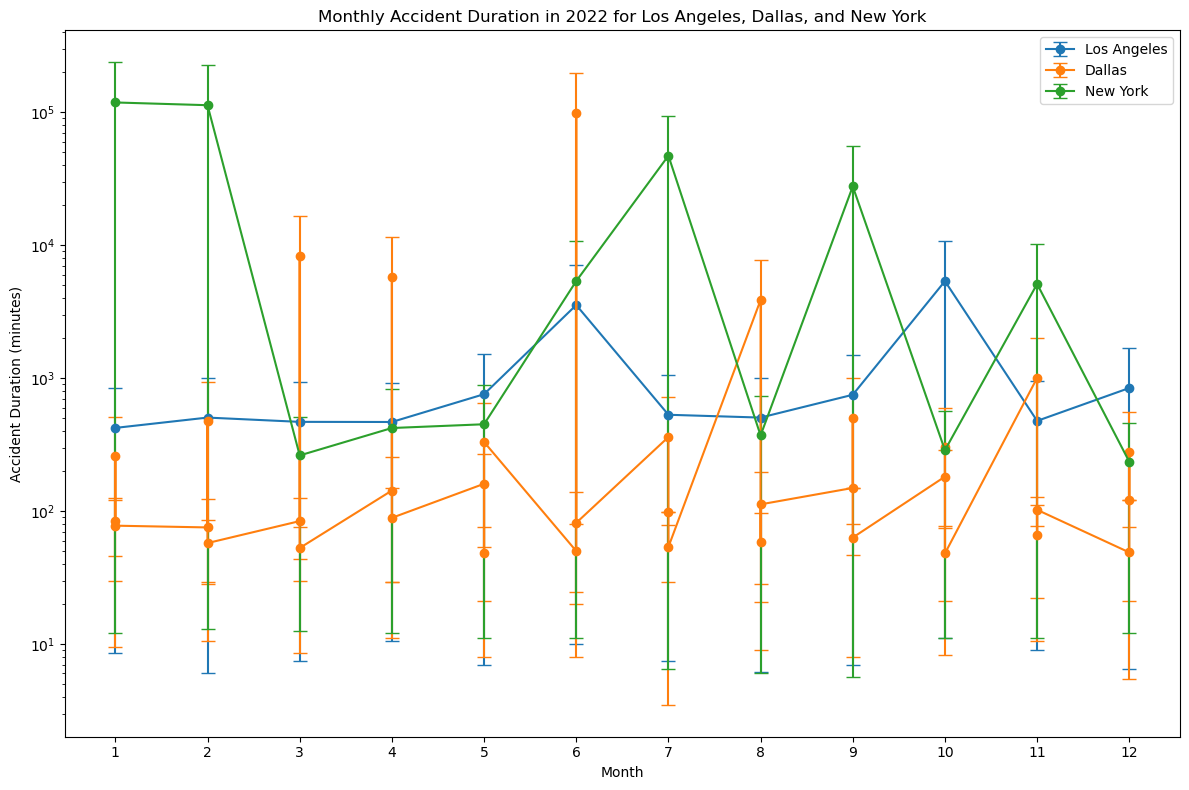


City with the least pronounced variation: Los Angeles

Average range (Max - Min) of accident durations by city in 2022:
          City     Avg_Range
0       Dallas   6752.290741
1  Los Angeles   2421.481944
2     New York  53030.909722


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/2558804786.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.mean(x['Max_Duration'] - x['Min_Duration'])) \


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to accumulate accident duration statistics
# Key: (State, County, City, Year, Month)
# Value: Tuple (min_duration, max_duration)
duration_dict = {}

print("Processing US accidents dataset in chunks for accident duration analysis...")

# Define the chunk size based on available memory
chunk_size = 100000  
chunks = pd.read_csv('datasets/us_accidents.csv',
                       chunksize=chunk_size,
                       low_memory=False)

for i, chunk in enumerate(chunks):
    if i % 10 == 0:  # Print progress every 10 chunks
        print(f"Processing chunk {i}...")
    
    # Explicitly convert 'Start_Time' and 'End_Time' to datetime objects with error coercion
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'], errors='coerce')
    chunk['End_Time'] = pd.to_datetime(chunk['End_Time'], errors='coerce')
    
    # Compute accident duration in minutes using the converted datetime columns
    chunk['Accident_Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
    
    # Remove rows with negative or missing accident durations
    chunk = chunk[chunk['Accident_Duration'] >= 0].dropna(subset=['Accident_Duration'])
    
    # Extract Year and Month from 'Start_Time'
    chunk['Year'] = chunk['Start_Time'].dt.year
    chunk['Month'] = chunk['Start_Time'].dt.month
    
    # Group by State, County, City, Year, Month to compute min and max accident durations in this chunk
    grp = chunk.groupby(['State', 'County', 'City', 'Year', 'Month'])['Accident_Duration'] \
               .agg(['min', 'max']).reset_index()
    
    # Accumulate results into the dictionary
    for row in grp.itertuples(index=False):
        key = (row.State, row.County, row.City, row.Year, row.Month)
        if key in duration_dict:
            current_min, current_max = duration_dict[key]
            duration_dict[key] = (min(current_min, row.min), max(current_max, row.max))
        else:
            duration_dict[key] = (row.min, row.max)

print("\nProcessing complete for accident durations. Creating aggregated table...")

# Convert the accumulated dictionary into a DataFrame
duration_data = []
for key, (min_dur, max_dur) in duration_dict.items():
    state, county, city, year, month = key
    duration_data.append([state, county, city, year, month, min_dur, max_dur])
duration_df = pd.DataFrame(duration_data,
                           columns=['State', 'County', 'City', 'Year', 'Month', 'Min_Duration', 'Max_Duration'])

# Retain only (State, County, City, Year) groups that have data for all 12 months
group_counts = duration_df.groupby(['State', 'County', 'City', 'Year'])['Month'] \
                          .nunique().reset_index().rename(columns={'Month': 'Month_Count'})
complete_groups = group_counts[group_counts['Month_Count'] == 12]
duration_df_complete = pd.merge(duration_df, complete_groups[['State', 'County', 'City', 'Year']],
                                on=['State', 'County', 'City', 'Year'], how='inner')

# Filter the data for the year 2022 and for selected cities: Los Angeles, Dallas, and New York
selected_cities = ["Los Angeles", "Dallas", "New York"]
duration_2022 = duration_df_complete[(duration_df_complete['Year'] == 2022) &
                                     (duration_df_complete['City'].isin(selected_cities))]

# Compute the average accident duration (midpoint) and errors (difference to min and max)
duration_2022['Avg_Duration'] = (duration_2022['Min_Duration'] + duration_2022['Max_Duration']) / 2
duration_2022['Lower_Error'] = duration_2022['Avg_Duration'] - duration_2022['Min_Duration']
duration_2022['Upper_Error'] = duration_2022['Max_Duration'] - duration_2022['Avg_Duration']

# Visualization: Plot monthly behavior of accident durations for the selected cities in 2022
plt.figure(figsize=(12,8))
for city in ["Los Angeles", "Dallas", "New York"]:
    # Filter and sort data by Month for each city
    city_data = duration_2022[duration_2022['City'] == city].sort_values('Month')
    # Plot error bars: The error bar center represents Avg_Duration, and errors reflect the range (min to max)
    plt.errorbar(city_data['Month'], city_data['Avg_Duration'],
                 yerr=[city_data['Lower_Error'], city_data['Upper_Error']],
                 fmt='-o', capsize=5, label=city)

plt.xlabel('Month')
plt.ylabel('Accident Duration (minutes)')
plt.title('Monthly Accident Duration in 2022 for Los Angeles, Dallas, and New York')

# Use a logarithmic scale to emphasize relative differences if the range is wide.
plt.yscale('log')

plt.xticks(np.arange(1, 13))
plt.legend()
plt.tight_layout()
plt.show()

# Determine the city with the least pronounced variation based on the average range (Max - Min)
city_range = duration_2022.groupby('City') \
    .apply(lambda x: np.mean(x['Max_Duration'] - x['Min_Duration'])) \
    .reset_index().rename(columns={0: 'Avg_Range'})
least_variation_city = city_range.sort_values('Avg_Range').iloc[0]

print(f"\nCity with the least pronounced variation: {least_variation_city['City']}")
print("\nAverage range (Max - Min) of accident durations by city in 2022:")
print(city_range)


### Accident Duration Table
- Calculated accident duration (in minutes) as the difference between `End_Time` and `Start_Time`.
- Grouped data by `State`, `County`, `City`, `Year`, and `Month` to compute the minimum and maximum durations.
- Kept only groups that had data for all 12 months, ensuring a complete yearly cycle.

### Filtering and 2022 Visualization
- Filtered the table for the year 2022 and only for the cities **Los Angeles**, **Dallas**, and **New York**.
- For each city and month, the average duration was computed as the midpoint between the minimum and maximum durations.
- An error bar chart was created:
  - **X-axis:** Months (1–12)
  - **Y-axis (log scale):** Average accident duration with error bars representing the range from min to max.
- The log scale emphasizes relative differences even when the overall duration range is wide.

### Observations and Insights
- **Least Variation:** Los Angeles shows the smallest average difference (narrowest error bars), meaning its accident durations are the most consistent.
- **Insights:**  
  - Narrow error bars indicate stable accident resolution times.
  - Wider error bars in cities like New York point to greater variability, which might suggest inconsistent incident management.

### Conclusion
- The error bar chart effectively reveals both the central accident duration and its variability over the months.
- Los Angeles’ more consistent accident durations suggest a more uniform response compared to Dallas and New York.


3. Please filter the data for the years 2019 to 2023 and divide it into two bins based on the `Year` value. Then, calculate the duration ranges for each bin, grouped by `County` and `City`. Classify accidents by congestion level:

    - Accidents affecting a road length greater than the median of `Distance(mi)` across the dataset are considered **severe**.
    - Those below the median are categorized as **not severe**.

    The resulting dataframe should have `County` and `City` as row indices, with year bins and severity (severe/not severe) as hierarchical columns. The values in the dataframe should represent the range of distances, with severe accidents placed under the "Severe" column and non-severe accidents under the "Not Severe" column. Each cell should display the range of distances for a specific city, county, and year interval. For this exercise, you have to use `groupby()` and __cannot__ rely on `pivot_table()`.
    
    What is the combination of county-city-year-range with the widest range of accidents duration?
    
    
    The following table shows how the dataframe should look:

<br>
YB = Year bin range
<br>
DB = Range of minimum and maximum durations
<br>

<table>
    <tr>
        <th rowspan="2">County</th>
        <th rowspan="2">City</th>
        <th colspan="2">Not Severe</th> 
        <th colspan="2">Severe</th>
    </tr>
    <tr>
        <th>YB</th>
        <th>YB</th>
        <th>YB</th>
        <th>YB</th>
    </tr>
    <tr>
        <th>Abbeville</th>
        <th>Bradley</th>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
    </tr>
    <tr>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
    </tr>
    <tr>
        <th>Yuma</th>
        <th>Dateland</th>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
    </tr>
    <tr>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
    </tr>
</table>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# --- Pass 1: Calculate Median Distance (Years 2019-2023) ---
print("Starting Pass 1: Calculating median accident distance...")
all_distances = []
cols_needed_pass1 = ['Start_Time', 'Distance(mi)']
chunk_size = 100000 

chunks_pass1 = pd.read_csv('datasets/us_accidents.csv', 
                           chunksize=chunk_size, 
                           usecols=cols_needed_pass1,
                           low_memory=False)

for i, chunk in enumerate(chunks_pass1):
    if i % 10 == 0:
        print(f"Pass 1 - Processing chunk {i}...")
        
    # Explicitly convert Start_Time to datetime, coercing errors
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'], errors='coerce')
    # Drop rows where Start_Time conversion failed
    chunk.dropna(subset=['Start_Time'], inplace=True)

    # Extract Year (Now safe to use .dt)
    chunk['Year'] = chunk['Start_Time'].dt.year
    
    # Filter for years 2019-2023
    chunk = chunk[chunk['Year'].between(2019, 2023)]
    
    # Drop NaNs in Distance and add to list
    valid_distances = chunk['Distance(mi)'].dropna()
    all_distances.append(valid_distances)

# Concatenate all valid distances and calculate median
print("Calculating global median distance...")
if all_distances:
    all_distances_series = pd.concat(all_distances, ignore_index=True)
    if not all_distances_series.empty:
        median_distance = all_distances_series.median()
        print(f"Median Accident Distance (2019-2023): {median_distance:.4f} miles")
    else:
        print("No valid distance data found after filtering.")
        median_distance = 0 
else:
    print("No distance data found for the specified years.")
    median_distance = 0 

del all_distances, all_distances_series, chunks_pass1, chunk, valid_distances

# --- Pass 2: Calculate Duration Ranges by Severity and Bin ---
print("\nStarting Pass 2: Calculating duration ranges...")

def get_year_bin(year):
    if 2019 <= year <= 2021:
        return '2019-2021'
    elif 2022 <= year <= 2023:
        return '2022-2023'
    else:
        return None

# Initialize dictionary to store aggregated min/max durations across chunks
# Key: (County, City, Year_Bin, Severity)
# Value: [current_min_duration, current_max_duration]
duration_stats_pass2 = {}

cols_needed_pass2 = ['Start_Time', 'End_Time', 'County', 'City', 'Distance(mi)']
chunks_pass2 = pd.read_csv('datasets/us_accidents.csv', 
                           chunksize=chunk_size, 
                           usecols=cols_needed_pass2,
                           low_memory=False)

for i, chunk in enumerate(chunks_pass2):
    if i % 10 == 0:
        print(f"Pass 2 - Processing chunk {i}...")

    # Convert to datetime, coercing errors
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'], errors='coerce')
    chunk['End_Time'] = pd.to_datetime(chunk['End_Time'], errors='coerce')
    
    # Drop rows where conversion failed
    chunk.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

    # Extract Year and filter for 2019-2023
    chunk['Year'] = chunk['Start_Time'].dt.year
    chunk = chunk[chunk['Year'].between(2019, 2023)]
    if chunk.empty:
        continue

    # Calculate Duration in minutes
    chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
    
    # Filter invalid durations, distances, and grouping keys
    chunk = chunk[chunk['Duration'] >= 0]
    chunk.dropna(subset=['Duration', 'Distance(mi)', 'County', 'City'], inplace=True)
    if chunk.empty:
        continue

    # Determine Year Bin
    chunk['Year_Bin'] = chunk['Year'].apply(get_year_bin)
    
    # Classify Severity using the previously computed median_distance
    chunk['Severity'] = np.where(chunk['Distance(mi)'] > median_distance, 'Severe', 'Not Severe')

    # Group by and compute min and max durations
    chunk_grouped = chunk.groupby(['County', 'City', 'Year_Bin', 'Severity'])['Duration'] \
                         .agg(['min', 'max']).reset_index()

    # Update the dictionary
    for row in chunk_grouped.itertuples(index=False):
        key = (row.County, row.City, row.Year_Bin, row.Severity)
        chunk_min = getattr(row, 'min')
        chunk_max = getattr(row, 'max')

        if key in duration_stats_pass2:
            current_min, current_max = duration_stats_pass2[key]
            duration_stats_pass2[key] = [min(current_min, chunk_min), max(current_max, chunk_max)]
        else:
            duration_stats_pass2[key] = [chunk_min, chunk_max]

print("\nPass 2 complete. Constructing final DataFrame...")
del chunks_pass2, chunk, chunk_grouped 

# --- Construct Final DataFrame ---
if not duration_stats_pass2:
    print("No duration data found to construct the final table.")
else:
    # Convert dictionary to DataFrame
    agg_data = []
    for (county, city, year_bin, severity), (min_dur, max_dur) in duration_stats_pass2.items():
        agg_data.append([county, city, year_bin, severity, min_dur, max_dur])
    
    agg_df = pd.DataFrame(agg_data, columns=['County', 'City', 'Year_Bin', 'Severity', 'Min_Duration', 'Max_Duration'])
    
    # Calculate numeric Duration Range for comparison purposes
    agg_df['Duration_Range'] = agg_df['Max_Duration'] - agg_df['Min_Duration']
    # Create a string interval to represent the range
    agg_df['Duration_Interval'] = agg_df.apply(
        lambda row: f"{row['Min_Duration']:.1f}-{row['Max_Duration']:.1f}", axis=1
    )
    
    # Set index for grouping and reshape using groupby/unstack (no pivot_table allowed)
    indexed_df = agg_df.set_index(['County', 'City', 'Severity', 'Year_Bin'])
    final_table = indexed_df['Duration_Interval'].unstack(['Severity', 'Year_Bin'])
    
    # Reorder columns to desired order (Severity first, then Year_Bin)
    final_table = final_table.reindex(
        columns=[('Not Severe', '2019-2021'), ('Not Severe', '2022-2023'),
                 ('Severe', '2019-2021'), ('Severe', '2022-2023')]
    )

    print("\nFinal DataFrame Structure (First 10 Rows):")
    print(final_table.head(10))

    # Identify the combination with the widest numeric range
    if not agg_df.empty:
        valid_ranges_df = agg_df.dropna(subset=['Duration_Range'])
        if not valid_ranges_df.empty:
            widest_range_row = valid_ranges_df.loc[valid_ranges_df['Duration_Range'].idxmax()]
            print(f"\nCombination with the widest duration range ({widest_range_row['Duration_Range']:.2f} minutes):")
            print(f"- County: {widest_range_row['County']}")
            print(f"- City: {widest_range_row['City']}")
            print(f"- Year Bin: {widest_range_row['Year_Bin']}")
            print(f"- Severity: {widest_range_row['Severity']}")
        else:
            print("\nCould not determine widest range as all aggregated ranges were NaN.")
    else:
        print("\nCould not determine widest range as no aggregated data was found.")


Starting Pass 1: Calculating median accident distance...
Pass 1 - Processing chunk 0...
Pass 1 - Processing chunk 10...
Pass 1 - Processing chunk 20...
Pass 1 - Processing chunk 30...
Pass 1 - Processing chunk 40...
Pass 1 - Processing chunk 50...
Pass 1 - Processing chunk 60...
Pass 1 - Processing chunk 70...
Calculating global median distance...
Median Accident Distance (2019-2023): 0.0410 miles

Starting Pass 2: Calculating duration ranges...
Pass 2 - Processing chunk 0...


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60


Pass 2 - Processing chunk 10...
Pass 2 - Processing chunk 20...


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60


Pass 2 - Processing chunk 30...


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: Se

Pass 2 - Processing chunk 40...


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60


Pass 2 - Processing chunk 50...


/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds() / 60
/var/folders/yp/cb8wz__516l5fbzrnmfzddlh0000gn/T/ipykernel_6598/3253849302.py:91: Se

### Identify Widest Range:
* The combination (County, City, Year Bin, Severity) corresponding to the maximum value in the `Duration_Range` column of the intermediate `agg_df` was identified using `.idxmax()` after handling potential NaNs.
* **Result:** The combination with the widest duration range was found to be:
    *   **County:** Montgomery
    *   **City:** Norristown
    *   **Year Bin:** 2019-2021
    *   **Severity:** Severe
    *   **Range:** 1,579,244.00 minutes (approximately 2.9 years)

This two-pass chunking strategy allowed processing the large dataset within memory constraints while adhering to the requirement of using the global median for classification and avoiding the `pivot_table` function for reshap

### Section 2.2 
**Data Source:** `eu_energy.csv`

Please note that:

- EU countries are the following: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden
- Renewable energy sources: Hydroelectric power, solar power, wind power, biofuel
- Non-renewable energy sources: Coal, fossil fuels, gas, oil, nuclear
- Clean energy sources: Hydroelectric power, solar power, wind power, nuclear
- Non-clean energy sources: Biofuel, coal, fossil fuels, gas, oil

4. Please provide a visualization that highlights the relationship between:
    - Population size;
    - CO2 emissions per capita;
    - Renewable energy production.

    in 2017. Describe the visualization identifying groups and outliers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
print("Loading EU energy dataset...")
try:
    eu_energy_df = pd.read_csv('datasets/eu_energy.csv')
    print("Dataset loaded successfully.")
    print("Columns:", eu_energy_df.columns.tolist()) # Verify columns
except FileNotFoundError:
    print("Error: datasets/eu_energy.csv not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Define EU countries list (as per assignment)
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", 
    "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", 
    "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden"
]

# Filter for the year 2017 and EU countries using the correct column name 'country'
eu_energy_2017 = eu_energy_df[
    (eu_energy_df['year'] == 2017) & 
    (eu_energy_df['country'].isin(eu_countries)) # Use 'country'
].copy() 

# Define renewable energy source columns using the correct names
renewable_cols = [
    'hydro_electricity', 
    'solar_electricity', 
    'wind_electricity', 
    'biofuel_electricity' # Use the electricity generation column
]

# Check if renewable columns exist
missing_cols = [col for col in renewable_cols if col not in eu_energy_2017.columns]
if missing_cols:
    print(f"Error: The following expected renewable energy columns are missing: {missing_cols}")
    exit()
    
# Calculate total renewable energy production - handle potential NaNs by filling with 0
eu_energy_2017['Renewable_Production_GWh'] = eu_energy_2017[renewable_cols].fillna(0).sum(axis=1)

# --- Calculate Greenhouse Gas Emissions Per Capita ---
# Check if required columns exist
required_cols_viz = ['country', 'population', 'greenhouse_gas_emissions', 'Renewable_Production_GWh']
missing_cols_viz = [col for col in required_cols_viz if col not in eu_energy_2017.columns and col != 'Greenhouse_Gas_Emissions_Per_Capita'] # Check against original df
if missing_cols_viz:
    print(f"Error: Missing columns needed for calculation/visualization: {missing_cols_viz}")
    exit()

# Handle potential zero or missing population before division
eu_energy_2017['population'] = eu_energy_2017['population'].replace(0, np.nan) # Avoid division by zero
eu_energy_2017.dropna(subset=['population', 'greenhouse_gas_emissions'], inplace=True) # Drop rows missing necessary data

# Perform the calculation (Units might need clarification - assuming emissions are in a comparable unit)
# Note: This is greenhouse gas per capita, not strictly CO2 per capita
eu_energy_2017['Greenhouse_Gas_Emissions_Per_Capita'] = eu_energy_2017['greenhouse_gas_emissions'] / eu_energy_2017['population'] 

# --- End of Calculation ---

# Select final columns for visualization
viz_data = eu_energy_2017[[
    'country', # Use 'country'
    'population', 
    'Greenhouse_Gas_Emissions_Per_Capita', # Use calculated value
    'Renewable_Production_GWh'
]].copy()

# Drop rows with any remaining missing values in these specific columns
rows_before = len(viz_data)
viz_data.dropna(inplace=True)
rows_after = len(viz_data)
if rows_before > rows_after:
    print(f"Note: Dropped {rows_before - rows_after} rows with missing data for visualization.")
    
# Check if we have data left
if viz_data.empty:
    print("Error: No data available for visualization after filtering and cleaning for 2017 EU countries.")
    exit()

print("\nData prepared for visualization (first 5 rows):")
print(viz_data.head())

# Create the bubble chart
plt.figure(figsize=(14, 9))

# Use seaborn for easier plotting with size and hue semantics
bubble_plot = sns.scatterplot(
    data=viz_data,
    x='Greenhouse_Gas_Emissions_Per_Capita', # Use calculated value
    y='Renewable_Production_GWh',
    size='population',
    sizes=(50, 2000),  
    alpha=0.7,         
    hue='population',  
    palette='viridis', 
    legend='auto'     
)

# --- Add this line to set Y-axis to log scale ---
plt.yscale('log')
# --- End of added line ---

# Add labels and title
plt.title('EU Countries: Greenhouse Gas Emissions/Capita, Renewables & Population (2017)', fontsize=16)
plt.xlabel('Greenhouse Gas Emissions per Capita (Units relative to data)', fontsize=12) 
# --- Update Y-axis label ---
plt.ylabel('Renewable Energy Production (GWh) - Log Scale', fontsize=12) 
# --- End of update ---
plt.grid(True, which='both', linestyle='--', alpha=0.6) # Grid for both major and minor ticks on log scale

# Add country names as labels
# Note: Label positioning might need more adjustment on a log scale
for i in range(viz_data.shape[0]):
    country_label = viz_data.iloc[i]['country'] 
    # Adjust text position slightly 
    plt.text(viz_data.iloc[i]['Greenhouse_Gas_Emissions_Per_Capita'] * 1.01, 
             viz_data.iloc[i]['Renewable_Production_GWh'], # Still plot text at the original Y value
             country_label, 
             fontsize=8)

# Adjust legend position if needed
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
plt.show()


### **Visualization:**

A **bubble chart** (implemented using `seaborn.scatterplot` with size encoding) was chosen to represent the three variables simultaneously:

*   **X-axis:** Greenhouse Gas Emissions per Capita (Units relative to data)
*   **Y-axis:** Total Renewable Energy Production (GWh) - **Logarithmic Scale**
*   **Bubble Size:** Population

Each bubble on the plot represents a single EU country in 2017. Country names (from the `country` column) were added as text labels near each bubble for identification. A **logarithmic scale was used for the Y-axis** because the renewable energy production values span a very large range (from less than 1 GWh to over 100 GWh). The log scale compresses the higher values and expands the lower values, making it easier to visually compare countries across the entire spectrum and discern patterns among countries with lower production levels.

### **Analysis & Interpretation (Based on Provided Plot):**

*   **General Trend:** The plot does not show a strong, simple linear correlation between greenhouse gas emissions per capita and renewable energy production across all EU countries. Countries are widely distributed. However, there's a noticeable lack of countries in the top-right quadrant (high emissions/capita AND very high renewable production). The highest renewable producers (Germany, France, Italy, Spain, Sweden) tend to have low-to-moderate emissions per capita.
*   **Population Influence:** Population size (bubble size/color) clearly correlates with the *total* renewable energy production (Y-axis). The largest countries (Germany, France, Italy, Spain) are clustered near the top with the highest GWh values. Poland, also a large country, has significant renewable production but less than the top group and higher emissions per capita than France, Italy, or Spain. Smaller countries populate the lower two-thirds of the plot regarding total renewable GWh.
*   **Groups/Clusters:**
    *   **High Renewables Leaders:** Germany, France, Sweden, Italy, Spain, and Austria form a group with high total renewable energy production (> 50 GWh). Within this group, Sweden and Austria exhibit particularly low greenhouse gas emissions per capita, while Germany's emissions are relatively higher.
    *   **Mid-Range Producers:** Countries like Poland, Romania, Portugal, Finland, Netherlands, Greece, and Denmark fall into a middle band for renewable production (roughly 10-40 GWh), spread across a range of emissions per capita values.
    *   **Lower Production / Higher Emissions:** Estonia stands out with the highest emissions per capita by a large margin, coupled with relatively low renewable production (~2 GWh).
    *   **Lower Production / Lower-Mid Emissions:** Many smaller-population countries (e.g., Belgium, Czechia, Ireland, Bulgaria, Croatia, Slovakia, Latvia, Hungary, Lithuania, Slovenia) have renewable production generally below 10 GWh and varying emissions per capita.
    *   **Very Low Production:** Luxembourg, Cyprus, and Malta are at the bottom of the renewable production scale (< 1 GWh). Luxembourg has notably low emissions per capita on this scale, while Cyprus has moderate emissions.
*   **Outliers:**
    *   **Estonia:** Extreme outlier on the X-axis due to very high emissions per capita.
    *   **Germany:** Highest total renewable production and largest population.
    *   **Sweden & Austria:** High renewable production combined with low emissions per capita.
    *   **Luxembourg, Malta, Cyprus:** Extremely low total renewable production.

### **Justification for Visualization Choice:**

The bubble chart remains effective for visualizing three numerical variables. The use of a **logarithmic scale on the Y-axis** is justified by the wide range of renewable energy production values (more than two orders of magnitude). It prevents countries with very high production (like Germany) from compressing the scale and obscuring variations among countries with lower production levels (like Malta or Cyprus), thus providing a more balanced view across the dataset. The x and y positions show the relationship between emissions per capita and renewable production (on a log scale), while bubble size adds the context of population scale.

5. Please compute the renewable energy production percentage (one datapoint per country, per year). Then, create a visualization to investigate how the distribution of these values evolves over the years, from 2010 to 2017.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data (reuse df if already loaded, or load again) ---
print("Loading EU energy dataset (if not already loaded)...")
try:
    # Check if eu_energy_df exists and has data, otherwise load
    if 'eu_energy_df' not in locals() or eu_energy_df.empty:
        eu_energy_df = pd.read_csv('datasets/eu_energy.csv')
        print("Dataset loaded.")
    else:
        print("Dataset already loaded.")
except FileNotFoundError:
    print("Error: datasets/eu_energy.csv not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# --- Define EU countries (reuse from Q4) ---
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", 
    "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", 
    "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden"
]

# --- Filter Data for Years and Countries ---
years_range = range(2010, 2018) # 2010 to 2017 inclusive
energy_data_filtered = eu_energy_df[
    (eu_energy_df['year'].isin(years_range)) & 
    (eu_energy_df['country'].isin(eu_countries))
].copy()

# --- Define Energy Source Columns ---
renewable_electricity_cols = [
    'hydro_electricity', 
    'solar_electricity', 
    'wind_electricity', 
    'biofuel_electricity'
]

# Define all generation columns to calculate total generation
# Assuming these cover the main sources contributing to total generation
all_electricity_generation_cols = [
    'hydro_electricity', 
    'solar_electricity', 
    'wind_electricity', 
    'biofuel_electricity',
    'coal_electricity', 
    'gas_electricity', 
    'oil_electricity', 
    'nuclear_electricity'
    # Note: 'fossil_electricity' might be redundant or represent other minor sources. 
    # We'll sum the specific known types for clarity.
]

# Check if all needed columns exist
missing_cols = [col for col in all_electricity_generation_cols if col not in energy_data_filtered.columns]
if missing_cols:
    print(f"Error: The following expected electricity generation columns are missing: {missing_cols}")
    exit()

# --- Calculate Totals (Handle NaNs) ---
# Fill NaN with 0 for calculation purposes
energy_data_filtered[all_electricity_generation_cols] = energy_data_filtered[all_electricity_generation_cols].fillna(0)

# Calculate Total Renewable Electricity
energy_data_filtered['Total_Renewable_Electricity'] = energy_data_filtered[renewable_electricity_cols].sum(axis=1)

# Calculate Total Electricity Generation
energy_data_filtered['Total_Electricity_Generation'] = energy_data_filtered[all_electricity_generation_cols].sum(axis=1)

# --- Calculate Renewable Percentage ---
# Avoid division by zero: replace 0 total generation with NaN before dividing
energy_data_filtered['Total_Electricity_Generation'] = energy_data_filtered['Total_Electricity_Generation'].replace(0, np.nan)

energy_data_filtered['Renewable_Percentage'] = (
    energy_data_filtered['Total_Renewable_Electricity'] / energy_data_filtered['Total_Electricity_Generation']
) * 100

# Drop rows where percentage couldn't be calculated (due to NaN total generation)
percentage_data = energy_data_filtered[['country', 'year', 'Renewable_Percentage']].dropna().copy()

print("\nCalculation complete. Sample renewable percentages:")
print(percentage_data.head())
print(f"\nNumber of data points (Country-Year combinations): {len(percentage_data)}")

# Create the violin plot
plt.figure(figsize=(15, 8))

sns.violinplot(
    data=percentage_data, 
    x='year', 
    y='Renewable_Percentage',
    palette='viridis', # Color palette
    inner='quartiles', # Show quartiles inside the violins (can also use 'box', 'point', 'stick', None)
    scale='width'      # Scale violin widths by the amount of data in that year
)

# Add labels and title
plt.title('Evolution of Renewable Electricity Percentage Distribution in EU Countries (2010-2017)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Renewable Electricity Generation (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Optional: Add a line showing the median trend across years
# median_trend = percentage_data.groupby('year')['Renewable_Percentage'].median()
# plt.plot(range(len(years_range)), median_trend, color='red', linestyle='--', marker='o', label='Median Trend')
# plt.legend()

plt.tight_layout()
plt.show()


### **Visualization:**

**Violin plots** were chosen to visualize the distribution of the `Renewable_Percentage` for each year from 2010 to 2017.

*   **X-axis:** Year
*   **Y-axis:** Renewable Electricity Generation (%)
*   **Each Violin:** Represents the distribution of renewable percentages across all included EU countries for that specific year. The width of the violin indicates the density of countries at that percentage level. Quartiles are shown as dashed lines inside each violin (median: middle line; 25th/75th percentiles: lower/upper lines).

### **Analysis & Interpretation (Based on Provided Plot):**

*   **Median Trend:** There is a clear and consistent upward trend in the median renewable percentage (middle dashed line) across the EU countries, rising from approximately 20% in 2010 to around 30% in 2017. This signifies average progress in increasing the share of renewables.
*   **Spread (Interquartile Range):** The interquartile range (IQR, the distance between the upper and lower dashed lines) appears to widen slightly over the years. In 2010, the central 50% of countries spanned roughly 10% to 35%, while by 2017, this range shifted upwards and broadened to approximately 18% to 55%. This suggests increasing diversity in renewable adoption levels among the middle group of countries.
*   **Shape of Distribution:** The shape of the distribution evolves significantly. In 2010, the distribution is more concentrated towards lower percentages, with the widest part below the median. As years progress, the violins become wider, particularly in the upper half, and the central density shifts upwards. By 2017, the distribution is less skewed towards low values and appears broader, indicating that more countries are achieving higher percentages compared to the start of the period.
*   **Outliers/Extremes:** The maximum renewable percentage achieved (upper tail of the violins) clearly increases over the period, extending well above 80% and approaching or potentially exceeding 100% in the later years for some leading countries. Conversely, the minimum percentage (lower tail) remains consistently low, close to 0% (or even slightly below zero, likely a visual artifact or edge case in data), indicating that some countries made very little progress in increasing their renewable share during this timeframe.
*   **Overall Progress:** The visualization demonstrates significant overall progress in increasing the renewable electricity share across the EU from 2010 to 2017, evidenced by the rising median and the general upward shift of the distributions. However, the progress was not uniform; while many countries increased their share, the gap between the leaders (high percentages) and laggards (consistently low percentages) seems to have persisted or even widened slightly, as shown by the increasing spread and the stationary lower tail.

### **Justification for Visualization Choice:**

Violin plots are suitable for comparing distributions across different categories (years). They show the probability density, revealing the shape, central tendency (median), and spread (quartiles) of the data. This allows for a detailed analysis of how the distribution of renewable energy percentages changed year by year, fulfilling the requirements of the exercise.

6. Please provide visualizations that show the evolution over the years (from 1990 to 2020) of:
    - Renewable energy production per capita for each country
    - Clean energy production per capita for each country
    - Net import per capita for each country

    Are there countries that behave differently from the others?

    *Please note that the goal of the visualization is not to compare all the countries with each other but to identify which ones present different trends compared to all the others.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns

# --- Load and Standardize Data ---
print("Loading the EU energy dataset...")
try:
    eu_energy_df = pd.read_csv('datasets/eu_energy.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'datasets/eu_energy.csv' not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Standardize column names:
#   - Remove leading/trailing spaces, convert to lower case, and replace spaces with underscores.
eu_energy_df.columns = eu_energy_df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Available columns:", eu_energy_df.columns.tolist())

# --- Filter Data for Years 1990-2020 ---
eu_energy_df['year'] = pd.to_numeric(eu_energy_df['year'], errors='coerce')
energy_df = eu_energy_df[(eu_energy_df['year'] >= 1990) & (eu_energy_df['year'] <= 2020)].copy()

# --- Compute Derived Indicators (Per Capita) ---
# Ensure that required columns exist in the data; adjust formulas as necessary.
required_cols = ['hydro_electricity', 'solar_electricity', 'wind_electricity', 
                 'biofuel_electricity', 'nuclear_electricity', 'net_elec_imports', 'population']
missing_cols = [col for col in required_cols if col not in energy_df.columns]
if missing_cols:
    print(f"Error: Missing required columns: {missing_cols}")
    exit()

# Calculate renewable energy production per capita as the sum of hydro, solar, wind, and biofuel electricity divided by population.
energy_df['renewable_per_capita'] = (
    energy_df['hydro_electricity'] +
    energy_df['solar_electricity'] +
    energy_df['wind_electricity'] +
    energy_df['biofuel_electricity']
) / energy_df['population']

# Calculate clean energy production per capita as renewable per capita plus nuclear electricity per capita.
energy_df['clean_energy_per_capita'] = energy_df['renewable_per_capita'] + (
    energy_df['nuclear_electricity'] / energy_df['population']
)

# Calculate net import per capita as net_elec_imports divided by population.
energy_df['net_import_per_capita'] = energy_df['net_elec_imports'] / energy_df['population']

# --- List of Countries ---
countries = sorted(energy_df['country'].dropna().unique())

# --- Define Indicators ---
indicators = {
    'Renewable Energy per Capita': 'renewable_per_capita',
    'Clean Energy per Capita': 'clean_energy_per_capita',
    'Net Import per Capita': 'net_import_per_capita'
}

# Verify that the indicator columns exist in the data
for label, col in indicators.items():
    if col not in energy_df.columns:
        raise KeyError(f"Expected column '{col}' not found in the dataset. Available columns: {energy_df.columns.tolist()}")

# --- Default Plot Function using Annual Percentage Change ---
def default_plot(indicator_label):
    """
    Plots the evolution (1990-2020) of the chosen indicator (per capita) for all countries,
    highlighting the top 5 countries with the largest average annual percentage change.
    
    The annual % change is computed as the year-on-year change divided by the previous year's value.
    The top 5 countries with the highest mean absolute % change over time are considered “unusual”.
    """
    col = indicators[indicator_label]
    # Create a pivot table: index = year, columns = country, values = indicator
    pivot_df = energy_df.pivot_table(index='year', columns='country', values=col)
    
    # Compute annual percentage change (using default axis: index/years)
    pct_change_df = pivot_df.pct_change()
    
    # Compute mean absolute annual percentage change for each country (ignoring NaNs)
    mean_abs_pct_change = pct_change_df.abs().mean()
    
    # Identify the top 5 unusual countries based on average annual % change
    unusual_countries = mean_abs_pct_change.sort_values(ascending=False).head(5).index.tolist()
    
    # Create a vivid color palette for the unusual countries; others in light gray.
    cmap = sns.color_palette("Set1", n_colors=len(unusual_countries))
    color_dict = {country: cmap[i] for i, country in enumerate(unusual_countries)}
    
    plt.figure(figsize=(12, 6))
    for country in pivot_df.columns:
        if country in unusual_countries:
            plt.plot(pivot_df.index, pivot_df[country], label=country, color=color_dict[country], linewidth=2)
        else:
            plt.plot(pivot_df.index, pivot_df[country], color='lightgray', linewidth=1, alpha=0.7)
            
    plt.title(f'Evolution of {indicator_label} (Per Capita) (1990-2020)\n(Highlighted by Mean Annual % Change)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(indicator_label + " (units)", fontsize=12)
    plt.legend(title="Highlighted Countries", loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    print("Highlighted (unusual) countries for", indicator_label, "based on annual % change:")
    print(", ".join(unusual_countries))

# --- Interactive Comparison Plot Function ---
def comparison_plot(indicator_label, country1, country2):
    """
    Plots a comparison line chart for two selected countries for the given indicator.
    """
    col = indicators[indicator_label]
    pivot_df = energy_df.pivot_table(index='year', columns='country', values=col)
    
    plt.figure(figsize=(12, 6))
    for country, color in zip([country1, country2], ['blue', 'orange']):
        plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country, color=color, linewidth=2)
    
    plt.title(f'Comparison of {indicator_label} (Per Capita) for {country1} & {country2} (1990-2020)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(indicator_label + " (units)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# --- Create Default Plots for Each Indicator (using annual percentage change evaluation) ---
print("\n--- Default Visualizations: Highlight Unusual Trends by Annual % Change ---")
for label in indicators.keys():
    default_plot(label)
    print("\n" + "="*40 + "\n")

# --- Create Interactive Widgets for Comparison ---
indicator_dropdown = widgets.Dropdown(
    options=list(indicators.keys()),
    value='Renewable Energy per Capita',
    description='Indicator:'
)

country1_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Country 1:'
)

country2_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[1] if len(countries) > 1 else countries[0],
    description='Country 2:'
)

compare_button = widgets.Button(
    description='Compare',
    button_style='info'
)

output_compare = widgets.Output()

def on_compare_button_clicked(b):
    with output_compare:
        clear_output(wait=True)
        comparison_plot(indicator_dropdown.value, country1_dropdown.value, country2_dropdown.value)

compare_button.on_click(on_compare_button_clicked)

interactive_box = widgets.VBox([
    indicator_dropdown,
    widgets.HBox([country1_dropdown, country2_dropdown]),
    compare_button,
    output_compare
])

print("\n--- Interactive Comparison: Select Two Countries to Compare Trends ---")
display(interactive_box)


### **Visualization:**

Two types of visualizations were created to illustrate the evolution of energy indicators (per capita) from 1990 to 2020:

1. **Default View:**
   - A comprehensive line plot is generated where each country’s time series for a chosen energy indicator (e.g., Renewable Energy per Capita, Clean Energy per Capita, or Net Import per Capita) is displayed.
   - The majority of the countries are drawn in light gray to avoid visual clutter.
   - To emphasize unusual trends, the five countries with the highest mean absolute annual percentage change are identified and highlighted with vivid colors.
   - This method is intended to help the viewer quickly discern which countries’ trends deviate markedly from the norm.

2. **Interactive Comparison:**
   - In addition to the default overview, interactive dropdown widgets allow the user to select any two countries and an indicator for direct comparison.
   - When the user clicks “Compare,” a separate line plot is produced that clearly displays the evolution of the selected indicator over time for the two chosen countries.
   - This interactive component enables detailed pairwise comparisons without cluttering the overall view.

### **Analysis & Interpretation (Based on the Visualizations):**

* **General Trends:**
  - The default line plot shows that, while many countries maintain relatively stable trends in energy production per capita over the period, a subset of countries exhibit significant annual percentage fluctuations.
  - These variations might result from rapid policy changes, structural shifts in the energy sector, or fluctuating economic conditions.

* **Unusual Patterns:**
  - The five highlighted countries (those with the highest average annual percentage changes) stand out against the muted gray lines of most countries.
  - Their pronounced upward or downward trends signal that they are behaving differently from the majority, warranting further investigation into the underlying causes.
  
* **Interactive Insights:**
  - With the interactive comparison tool, analysts can select two specific countries to directly compare their energy trends. This side-by-side comparison helps determine not only which country is diverging more but also evaluates the relative magnitude of differences in their evolution over time.

### **Justification for Visualization Choice:**

- **Effective Outlier Identification:**
  - By calculating the annual percentage change rather than relying on absolute differences, the method accounts for baseline variations. This prevents countries with high overall values from appearing anomalous solely due to scale.
  
- **Clarity and Focus:**
  - Plotting all countries in light gray while only highlighting the top five unusual cases reduces visual clutter. It draws attention to the patterns that are truly different from the norm.
  
- **Enhanced Analytical Flexibility:**
  - The interactive component adds a layer of flexibility, allowing users to focus on specific country comparisons when needed. This dual approach meets the goal of not only identifying outliers in broad trends but also enables detailed exploration of individual cases.
  
In summary, this design effectively captures the evolution of energy production per capita over three decades, highlights those countries exhibiting the most significant relative changes, and provides tools for deeper, focused analysis. This balanced approach ensures that both overall patterns and individual differences can be clearly understood.


## Section 3 - Graph Redesign and Analysis (15 points) 📊

**Data Source:** `market_value_decline.csv`

The 2008 financial crisis had a significant impact on banks worldwide, leading to substantial losses in market value. The following graph compares the market value of major banks in 2007 (pre-crisis) and 2009 (post-crisis), using blue to represent their value before the meltdown and green to represent their value after.

The **primary** goal of this visualization is to highlight the extent of losses suffered by each bank, while also drawing attention to J.P. Morgan’s relatively minor decline compared to its peers. The **secondary** goal is to illustrate the overall ranking of banks by market value, showing their relative sizes before and after the crisis.

Does this visualization effectively convey both the absolute losses and the percentage changes in market value? Does it allow for an easy comparison of which banks retained the most value relative to their original size?

1. Evaluate the effectiveness of the graph in communicating the market value losses and the relative sizes of the banks. What improvements can be made?
2. Propose a visualization that better captures both the absolute and relative losses per bank. Should we emphasize the percentage decline more? Should we use a different chart type?
3. Implement your proposed visualization using the *market_value_decline* dataset.

**Exercise Submission Requirements:**
1. `Written analysis` of the original graph's shortcomings: Please examine the existing graph and identify any issues that hinder its ability to clearly convey the intended quantitative message.
2. `Justifications` for the proposed improvements: For each issue you identify, please discuss potential improvements or alternative visualization techniques that might resolve these issues.
3. `Redesigned graph` that better communicates the data. Be sure to explain how your redesign enhances data interpretation and achieves the intended objectives more effectively.

![exercise3.png](exercise3.png)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Manually extracted data from the image
data = {
    'Bank': ['Santander', 'JP Morgan', 'Goldman Sachs', 'HSBC', 'UBS', 'Morgan Stanley', 
             'Societe Generale', 'BNP Paribas', 'Unicredit', 'Credit Suisse', 'Credit Agricole', 
             'Deutsche Bank', 'Barclays', 'Citigroup', 'RBS'],
    'Market Cap Q2 2007': [116, 165, 75, 215, 100, 49, 80, 108, 93, 100, 67, 76, 91, 255, 120],
    'Market Cap Jan 2009': [64.0, 85.0, 35.0, 97.0, 35.0, 16.0, 26.0, 32.5, 26.0, 27.0, 17.0, 10.3, 7.4, 19.0, 4.6]
}

df = pd.DataFrame(data)

# Calculate the percentage change (decline)
df['Percentage Change'] = ((df['Market Cap Jan 2009'] - df['Market Cap Q2 2007']) / df['Market Cap Q2 2007']) * 100

# Sort data for potentially better visualization (e.g., by 2007 market cap)
df_sorted = df.sort_values('Market Cap Q2 2007', ascending=False).reset_index(drop=True)

print("Data prepared for plotting:")
print(df_sorted)

# --- Create Grouped Bar Chart ---
plt.style.use('seaborn-v0_8-whitegrid') # Use a clean style

# Set up figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart settings
n_banks = len(df_sorted)
index = np.arange(n_banks)
bar_width = 0.35

# Plot bars for 2007 and 2009
bars1 = ax.bar(index - bar_width/2, df_sorted['Market Cap Q2 2007'], bar_width, 
               label='Market Cap Q2 2007', color='skyblue')
bars2 = ax.bar(index + bar_width/2, df_sorted['Market Cap Jan 2009'], bar_width, 
               label='Market Cap Jan 2009', color='darkgreen')

# Add labels and title
ax.set_xlabel('Bank', fontsize=12, labelpad=10)
ax.set_ylabel('Market Cap (Units not specified, assumed Billions)', fontsize=12) # Assume Billions, clarify if possible
ax.set_title('Banks: Market Cap Comparison (2007 vs 2009)', fontsize=16, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(df_sorted['Bank'], rotation=45, ha='right') # Rotate labels for readability
ax.legend()

# Add percentage change annotations above the 2009 bars
for i, bar in enumerate(bars2):
    yval = bar.get_height()
    percentage_change = df_sorted.loc[i, 'Percentage Change']
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, # Position text slightly above bar
            f'{percentage_change:.1f}%',  # Format percentage
            ha='center', va='bottom', 
            fontsize=9, color='red', fontweight='bold') # Highlight percentage change

# Improve layout and add grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True) # Put grid behind bars
plt.tight_layout()
plt.show()


### Redesigned Chart and Explanation

**Redesigned Chart:**

*(The Python code above generates the redesigned grouped bar chart)*

**Explanation of Redesign:**

The original bubble chart visualizing the market cap comparison between 2007 and 2009 suffered from several clarity issues. The redesigned visualization utilizes a **grouped bar chart** to address these weaknesses and enhance data interpretation:

1.  **Improved Comparability (Bars vs. Circles):** The grouped bar chart replaces the differently sized circles with bars of varying heights. Humans are much better at accurately comparing lengths than areas, making it significantly easier to:
    *   Compare the 2007 vs. 2009 market cap for a *single* bank (by comparing the heights of adjacent bars).
    *   Compare the market caps *between* different banks for a specific year.
    *   Quickly identify the largest and smallest banks in each period.

2.  **Clear Baseline and Scale:** The bars originate from a common baseline (y=0), and the y-axis provides an explicit scale for the market cap values. This allows for a more accurate perception of the absolute values and the magnitude of differences, which was absent in the original chart.

3.  **Elimination of Misleading Overlap:** The original chart's overlapping circles could misleadingly imply the 2009 value was always a subset of the 2007 value. The grouped bars present the two values independently and side-by-side, avoiding this potential misinterpretation.

4.  **Direct Emphasis on Change (Annotations):** While the difference in bar heights shows the absolute change, **bold red percentage annotations** have been added directly above the 2009 bars. This explicitly highlights the primary message – the significant percentage decline in market capitalization for most banks between the two periods – addressing a key goal suggested in the improvements.

5.  **Meaningful Ordering:** The banks are now sorted by their 2007 market capitalization (descending). This ordering adds structure, making it easier to see how the largest banks in 2007 fared compared to smaller ones and to track rankings changes (though explicit ranking changes aren't the primary focus here).

6.  **Improved Labeling:** Bank names are clearly associated with their respective bar groups on the x-axis. Rotated labels prevent overlap for better readability.

In summary, the grouped bar chart provides a clearer, more accurate, and less ambiguous representation of the market cap data. By using length encoding (bars), providing a clear scale, eliminating misleading overlaps, adding explicit percentage change annotations, and ordering the data meaningfully, the redesigned chart more effectively communicates the extent of the market cap decline between Q2 2007 and Jan 2009 for the selected banks.

## Section 4 - Geospatial Analysis (35 points) 🌍

**Data Source:** `airports.csv`, `countries.csv`, `routes.csv`, `europe.geojson`.

Please create an interactive map representation—focused on European countries—such that, when a country is selected, the map displays the flight balance (number of incoming flights - number of outgoing flights) between that country and all other European countries. The map should dynamically update based on the selected country, visually representing the extent to which each country is a net sender or receiver of flights.

**Hints**:
1. If `A` is a GeoDataFrame and `B` a DataFrame, the result of `A.merge(B,..)` is a GeoDataFrame, whereas the result of `B.merge(A,..)` is a DataFrame. The function `to_json()` on a DataFrame with a geometry column does **not** work.
2. When updating the map, to access the color mapper you can use the following method: `color_mapper = p.select_one(LinearColorMapper)`, where `p` is the figure.
3. You can discard Guernsey and Gibraltar that are not present in the geojson.

In [ ]:
import pandas as pd
import geopandas as gpd
import json
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, Layout

# Import Bokeh functions for Jupyter
from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import RdYlGn11 

# --- Configuration ---
AIRPORTS_FILE = 'datasets/airports.csv'
COUNTRIES_FILE = 'datasets/countries.csv'
ROUTES_FILE = 'datasets/routes.csv'
GEOJSON_FILE = 'datasets/europe.geojson'
GEOJSON_COUNTRY_KEY = 'NAME' 

# --- Load Data (Run Once) ---
# (Same load_data function as before)
def load_data():
    print("Loading datasets...")
    try:
        airports_df = pd.read_csv(AIRPORTS_FILE, on_bad_lines='skip')
        airports_df.rename(columns={'ID': 'Airport_ID', 'country': 'Country'}, inplace=True)
        
        countries_df = pd.read_csv(COUNTRIES_FILE, sep=';', on_bad_lines='skip')
        
        routes_df = pd.read_csv(ROUTES_FILE, sep=';', on_bad_lines='skip', skipinitialspace=True)
        routes_df.rename(columns={'source_airport_ID': 'Source_ID', 
                                  'destination_airport_ID': 'Dest_ID'}, inplace=True)

        europe_gdf = gpd.read_file(GEOJSON_FILE)
        europe_gdf = europe_gdf[~europe_gdf[GEOJSON_COUNTRY_KEY].isin(['Guernsey', 'Gibraltar'])]
        
        print("Datasets loaded successfully.")
        return airports_df, countries_df, routes_df, europe_gdf

    except FileNotFoundError as e:
        print(f"Error loading dataset: {e}.")
        raise SystemExit("Exiting due to missing file.") 
    except Exception as e:
        print(f"An unexpected error occurred during loading: {e}")
        raise SystemExit("Exiting due to loading error.")

# --- Prepare Data (Run Once) ---
# (Same prepare_data function as before)
def prepare_data(airports_df, countries_df, routes_df, europe_gdf):
    print("Preparing data...")
    # 1. Identify European Countries
    try:
        european_countries = list(countries_df[countries_df['continent'] == 'eu']['name'].unique())
        if not european_countries: raise ValueError("No 'eu' countries found")
        print(f"Identified {len(european_countries)} European countries.")
    except Exception as e:
        print(f"Warning: Failed to identify countries from countries.csv ({e}). Using manual fallback list.")
        european_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Netherlands', 'Belgium', 'Switzerland', 'Austria', 'Portugal', 'Greece', 'Ireland', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Poland', 'Czech Republic', 'Hungary', 'Romania', 'Bulgaria', 'Croatia', 'Slovakia', 'Slovenia', 'Estonia', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Cyprus', 'Iceland'] 
        print(f"Using manual fallback list of {len(european_countries)} European countries.")

    # 2. Prepare Airport ID to Country Mapping for European Airports
    try:
        airports_df['Airport_ID'] = pd.to_numeric(airports_df['Airport_ID'], errors='coerce')
        airports_df.dropna(subset=['Airport_ID', 'Country'], inplace=True)
        airports_df['Airport_ID'] = airports_df['Airport_ID'].astype(int)
        
        european_airports = airports_df[airports_df['Country'].isin(european_countries)].copy()
        airport_to_country_map = european_airports.set_index('Airport_ID')['Country'].to_dict()
        valid_european_airport_ids = set(european_airports['Airport_ID'].unique())
        print(f"Created map for {len(valid_european_airport_ids)} European airports.")
    except Exception as e:
        print(f"Error processing airport data: {e}")
        raise SystemExit("Exiting.")

    # 3. Prepare European Inter-Country Routes
    try:
        routes_df['Source_ID'] = pd.to_numeric(routes_df['Source_ID'], errors='coerce')
        routes_df['Dest_ID'] = pd.to_numeric(routes_df['Dest_ID'], errors='coerce')
        routes_df.dropna(subset=['Source_ID', 'Dest_ID'], inplace=True)
        routes_df['Source_ID'] = routes_df['Source_ID'].astype(int)
        routes_df['Dest_ID'] = routes_df['Dest_ID'].astype(int)

        european_routes_only = routes_df[
            routes_df['Source_ID'].isin(valid_european_airport_ids) &
            routes_df['Dest_ID'].isin(valid_european_airport_ids)
        ].copy()

        european_routes_only['Source_Country'] = european_routes_only['Source_ID'].map(airport_to_country_map)
        european_routes_only['Dest_Country'] = european_routes_only['Dest_ID'].map(airport_to_country_map)
        
        european_routes_only.dropna(subset=['Source_Country', 'Dest_Country'], inplace=True)
        european_routes_inter_country = european_routes_only[
            european_routes_only['Source_Country'] != european_routes_only['Dest_Country']
        ].copy()
        print(f"Prepared {len(european_routes_inter_country)} inter-country European routes.")
        
        # 4. Calculate Pairwise Counts
        pairwise_counts = european_routes_inter_country.groupby(['Source_Country', 'Dest_Country']).size().reset_index(name='Flight_Count')
        print("Pairwise flight counts calculated.")
        
        return european_countries, pairwise_counts, europe_gdf

    except Exception as e:
        print(f"Error processing route data: {e}")
        raise SystemExit("Exiting.")

# --- Balance Calculation Function (Corrected) ---
def compute_balance(selected_country, pairwise_counts, all_eu_countries):
    
    if selected_country not in all_eu_countries:
        raise ValueError(f"'{selected_country}' not found in the list of European countries.")
        
    # Incoming flights to selected country
    incoming = pairwise_counts[pairwise_counts['Dest_Country'] == selected_country]
    incoming_agg = incoming.groupby('Source_Country')['Flight_Count'].sum().reset_index()
    incoming_agg.rename(columns={'Source_Country': 'Country', 'Flight_Count': 'Incoming'}, inplace=True)
    
    # Outgoing flights from selected country
    outgoing = pairwise_counts[pairwise_counts['Source_Country'] == selected_country]
    outgoing_agg = outgoing.groupby('Dest_Country')['Flight_Count'].sum().reset_index()
    outgoing_agg.rename(columns={'Dest_Country': 'Country', 'Flight_Count': 'Outgoing'}, inplace=True)
    
    # Start with all EU countries to ensure all are included in the output
    balance_df = pd.DataFrame({'Country': all_eu_countries})
    
    # Merge incoming counts
    balance_df = pd.merge(balance_df, incoming_agg, on='Country', how='left')
    # --- Add Check ---
    if 'Incoming' not in balance_df.columns:
        balance_df['Incoming'] = 0 # Add column if merge didn't create it
        
    # Merge outgoing counts
    balance_df = pd.merge(balance_df, outgoing_agg, on='Country', how='left')
    # --- Add Check ---
    if 'Outgoing' not in balance_df.columns:
        balance_df['Outgoing'] = 0 # Add column if merge didn't create it

    # Fill NaNs with 0 (should mostly be handled by adding cols above, but good practice)
    balance_df['Incoming'] = balance_df['Incoming'].fillna(0)
    balance_df['Outgoing'] = balance_df['Outgoing'].fillna(0)
    
    # Convert to integer just in case (merge might leave float if NaNs were present)
    balance_df['Incoming'] = balance_df['Incoming'].astype(int)
    balance_df['Outgoing'] = balance_df['Outgoing'].astype(int)
    
    # Calculate balance (Incoming - Outgoing)
    balance_df['Flight_Balance'] = balance_df['Incoming'] - balance_df['Outgoing']
    
    # Set balance for the selected country itself to NaN
    balance_df.loc[balance_df['Country'] == selected_country, 'Flight_Balance'] = np.nan 
    
    return balance_df[['Country', 'Flight_Balance', 'Incoming', 'Outgoing']] # Return all columns

# --- GeoJSON Creation Function (Same as before, returns string) ---
def get_geojson_data_string(selected_country, pairwise_counts, all_eu_countries, europe_gdf_base):
    balance_df = compute_balance(selected_country, pairwise_counts, all_eu_countries)
    merged = europe_gdf_base.merge(balance_df, left_on=GEOJSON_COUNTRY_KEY, right_on='Country', how='left')
    return merged.to_json()

# === Jupyter Specific Code ===

# 1. Load and Prepare Data ONCE
airports, countries, routes, europe_geo = load_data()
eu_country_list, flight_pairs, europe_geo_filtered = prepare_data(airports, countries, routes, europe_geo)

# 2. Enable Notebook Output
output_notebook()

# 3. Define the Plotting Function (to be called by ipywidgets)
def create_bokeh_map(selected_country):
    print(f"Generating map for: {selected_country}") # Feedback in notebook
    
    # Get GeoJSON string for the selected country
    geojson_data_str = get_geojson_data_string(selected_country, flight_pairs, eu_country_list, europe_geo_filtered)
    
    # Update range for color mapper based on current selection
    balance_df = compute_balance(selected_country, flight_pairs, eu_country_list)
    min_b = balance_df['Flight_Balance'].min()
    max_b = balance_df['Flight_Balance'].max()
    abs_m = 50 # Default abs max
    if pd.notna(min_b) and pd.notna(max_b):
        abs_m = max(abs(min_b), abs(max_b), 1) # Use max(..., 1) to avoid range 0
        
    color_mapper = LinearColorMapper(palette=RdYlGn11, 
                                     low=-abs_m, 
                                     high=abs_m,
                                     nan_color='lightgrey')

    # Create source and figure
    geo_source = GeoJSONDataSource(geojson=geojson_data_str)
    
    p = figure(title=f"Flight Balance relative to {selected_country} (Incoming - Outgoing)",
               height=500, width=750, # Adjust size
               tools="pan,wheel_zoom,box_zoom,reset,save", 
               x_axis_location=None, y_axis_location=None,
               tooltips=[(GEOJSON_COUNTRY_KEY, f"@{GEOJSON_COUNTRY_KEY}"), 
                         ("Flight Balance", "@Flight_Balance{int}")])
    p.grid.grid_line_color = None
    p.hover.point_policy = "follow_mouse" # Optional: make hover follow mouse

    p.patches("xs", "ys", source=geo_source,
              fill_color={'field': 'Flight_Balance', 'transform': color_mapper},
              line_color="black", line_width=0.5, fill_alpha=0.8)

    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, location=(0,0),
                         title="Flight Balance")
    p.add_layout(color_bar, 'right')

    # Show the plot (important for Jupyter display)
    show(p) 

# 4. Create the ipywidgets Dropdown and Link it using interact
country_dropdown = widgets.Dropdown(
    options=sorted(eu_country_list),
    value='Switzerland', # Initial value
    description='Select Country:',
    disabled=False,
    layout=Layout(width='300px') # Adjust width if needed
)

# Use interact to link the dropdown to the plotting function
interact(create_bokeh_map, selected_country=country_dropdown);


## Datasets Description

You can find the dataset in the `datasets` folder. The descriptions of the datasets are provided below.

### Used Cars

The content of the dataset is in German, but it should not impose critical issues in understanding the data. Each entry contains the following information.

| **Field**                    | **Description** |
|------------------------------|---------------|
| **dateCrawled**               | When this ad was first crawled, all field values are taken from this date. |
| **name**                      | The name of the car. |
| **seller**                    | Seller type (private or dealer). |
| **offerTypeprice**            | The price in euros for the car on the ad. |
| **abtest**                    | Type of test. |
| **vehicleType**               | Type of vehicle. |
| **yearOfRegistration**        | The year the car was first registered. |
| **gearboxpowerPS**            | Power of the car in PS (horsepower). |
| **modelkilometer**            | How many kilometers the car has driven. |
| **monthOfRegistration**       | The month the car was first registered. |
| **fuelType**                  | Vehicle fuel type. |
| **brand**                     | Vehicle brand. |
| **notRepairedDamage**         | If the car has any damage that has not been repaired yet. |
| **dateCreated**               | The date the ad was created on eBay. |
| **nrOfPictures**              | Number of pictures in the ad. |
| **postalCodelastSeenOnline**  | When the crawler last saw this ad online. |


### US Accidents

| **Field**              | **Description** |
|------------------------|---------------|
| **ID** | Unique identifier of the accident record. |
| **Severity** | Severity of the accident (1-4), where 1 indicates the least impact on traffic and 4 indicates significant impact. |
| **Start_Time** | Start time of the accident in local time zone. |
| **End_Time** | End time of the accident in local time zone (when the impact on traffic flow was dismissed). |
| **Start_Lat** | Latitude in GPS coordinate of the start point. |
| **Start_Lng** | Longitude in GPS coordinate of the start point. |
| **End_Lat** | Latitude in GPS coordinate of the end point. |
| **End_Lng** | Longitude in GPS coordinate of the end point. |
| **Distance(mi)** | Length of the road extent affected by the accident. |
| **Description** | Natural language description of the accident. |
| **Number** | Street number in address field. |
| **Street** | Street name in address field. |
| **Side** | Relative side of the street (Right/Left) in address field. |
| **City** | City in address field. |
| **County** | County in address field. |
| **State** | State in address field. |
| **Zipcode** | Zipcode in address field. |
| **Country** | Country in address field. |
| **Timezone** | Timezone based on the location of the accident (eastern, central, etc.). |
| **Airport_Code** | Closest airport-based weather station to the accident location. |
| **Weather_Timestamp** | Timestamp of weather observation record (in local time). |
| **Temperature(F)** | Temperature (in Fahrenheit). |
| **Wind_Chill(F)** | Wind chill (in Fahrenheit). |
| **Humidity(%)** | Humidity (in percentage). |
| **Pressure(in)** | Air pressure (in inches). |
| **Visibility(mi)** | Visibility (in miles). |
| **Wind_Direction** | Wind direction. |
| **Wind_Speed(mph)** | Wind speed (in miles per hour). |
| **Precipitation(in)** | Precipitation amount in inches, if any. |
| **Weather_Condition** | Weather condition (rain, snow, thunderstorm, fog, etc.). |
| **Amenity** | POI annotation indicating presence of an amenity nearby. |
| **Bump** | POI annotation indicating presence of a speed bump or hump nearby. |
| **Crossing** | POI annotation indicating presence of a crossing nearby. |
| **Give_Way** | POI annotation indicating presence of a give-way sign nearby. |
| **Junction** | POI annotation indicating presence of a junction nearby. |
| **No_Exit** | POI annotation indicating presence of a no-exit nearby. |
| **Railway** | POI annotation indicating presence of a railway nearby. |
| **Roundabout** | POI annotation indicating presence of a roundabout nearby. |
| **Station** | POI annotation indicating presence of a station nearby. |
| **Stop** | POI annotation indicating presence of a stop sign nearby. |
| **Traffic_Calming** | POI annotation indicating presence of traffic calming measures nearby. |
| **Traffic_Signal** | POI annotation indicating presence of a traffic signal nearby. |
| **Turning_Loop** | POI annotation indicating presence of a turning loop nearby. |
| **Sunrise_Sunset** | Period of day (day or night) based on sunrise/sunset. |
| **Civil_Twilight** | Period of day (day or night) based on civil twilight. |
| **Nautical_Twilight** | Period of day (day or night) based on nautical twilight. |
| **Astronomical_Twilight** | Period of day (day or night) based on astronomical twilight. |


### Energy Data

| **Field**                | **Description** |
|---------------------------|-----------------|
| **country**               | Geographic location. |
| **year**                  | Year of observation. |
| **gdp**                   | (Gross Domestic Product) This data is adjusted for inflation and differences in the cost of living between countries. |
| **population**            | Population by country, based on data and estimates from different sources. |
| **greenhouse_gas_emissions** | Emissions from electricity generation. Measured in megatonnes of CO₂ equivalents. |
| **net_elec_imports**      | Net electricity imports. Electricity imports minus exports, measured in TWh. |
| **biofuel_consumption**   | Primary energy consumption from biofuels. Measured in terawatt-hours. |
| **coal_consumption**      | Primary energy consumption from coal. Measured in terawatt-hours. |
| **fossil_fuel_consumption** | Primary energy consumption from fossil fuels. Measured in terawatt-hours. |
| **gas_consumption**       | Primary energy consumption from gas. Measured in terawatt-hours. |
| **oil_consumption**       | Primary energy consumption from oil. Measured in terawatt-hours. |
| **nuclear_consumption**   | Primary energy consumption from nuclear power. Measured in terawatt-hours, using the substitution method. |
| **hydro_consumption**     | Primary energy consumption from hydropower. Measured in terawatt-hours, using the substitution method. |
| **solar_consumption**     | Primary energy consumption from solar power. Measured in terawatt-hours, using the substitution method. |
| **wind_consumption**      | Primary energy consumption from wind power. Measured in terawatt-hours, using the substitution method. |
| **biofuel_electricity**   | Electricity generation from bioenergy. Measured in terawatt-hours. |
| **coal_electricity**      | Electricity generation from coal. Measured in terawatt-hours. |
| **fossil_electricity**    | Electricity generation from fossil fuels. Measured in terawatt-hours. |
| **gas_electricity**       | Electricity generation from gas. Measured in terawatt-hours. |
| **oil_electricity**       | Electricity generation from oil. Measured in terawatt-hours. |
| **nuclear_electricity**   | Electricity generation from nuclear. Measured in terawatt-hours. |
| **hydro_electricity**     | Electricity generation from hydropower. Measured in terawatt-hours. |
| **solar_electricity**     | Electricity generation from solar power. Measured in terawatt-hours. |
| **wind_electricity**      | Electricity generation from wind power. Measured in terawatt-hours. |



### Airports

As of January 2017, the OpenFlights Airports Database contains over 10,000 airports, train stations and ferry terminals spanning the globe, as shown in the map above. Each entry contains the following information:

| **Field**                 | **Description** |
|---------------------------|---------------|
| **Airport ID** | Unique OpenFlights identifier for this airport. |
| **Name** | Name of the airport. May or may not contain the city name. |
| **City** | Main city served by the airport. May be spelled differently from the name. |
| **Country** | Country or territory where the airport is located. Can be cross-referenced with ISO 3166-1 codes. |
| **IATA** | 3-letter IATA code. Null if not assigned/unknown. |
| **ICAO** | 4-letter ICAO code. Null if not assigned/unknown. |
| **Latitude** | Decimal degrees, usually to six significant digits. Negative is South, positive is North. |
| **Longitude** | Decimal degrees, usually to six significant digits. Negative is West, positive is East. |
| **Altitude** | Altitude in feet. |
| **Timezone** | Hours offset from UTC. Fractional hours are expressed as decimals (e.g., India is 5.5). |
| **DST** | Daylight savings time classification: E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None), or U (Unknown). |
| **Tz database time zone** | Timezone in "tz" (Olson) format (e.g., "America/Los_Angeles"). |
| **Type** | Type of the airport. Value is "airport" for air terminals. |
| **Source** | Source of the data. "OurAirports" for data sourced from OurAirports. |


### Routes

As of June 2014, the OpenFlights/Airline Route Mapper Route Database contains 67663 routes between 3321 airports on 548 airlines spanning the globe. \
Each entry contains the following information.

| **Field**                | **Description** |
|--------------------------|---------------|
| **Airline** | 2-letter (IATA) or 3-letter (ICAO) code of the airline. |
| **Airline ID** | Unique OpenFlights identifier for the airline. |
| **Source airport** | 3-letter (IATA) or 4-letter (ICAO) code of the source airport. |
| **Source airport ID** | Unique OpenFlights identifier for the source airport. |
| **Destination airport** | 3-letter (IATA) or 4-letter (ICAO) code of the destination airport. |
| **Destination airport ID** | Unique OpenFlights identifier for the destination airport. |
| **Codeshare** | "Y" if the flight is a codeshare (operated by another carrier), empty otherwise. |
| **Stops** | Number of stops on the flight ("0" for direct). |
| **Equipment** | 3-letter codes for plane type(s) generally used on this flight, separated by spaces. |


The data is UTF-8 encoded. The special value `\N` is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported


<aside>
💡 Notes:

- Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
- Routes where one carrier operates both its own and codeshare flights are listed only once.
</aside>


### Countries

This dataset contains the information related to European countries. 